# Data Cleaning 

The goal of this notebook is to explore our college football datasets, identify outliers, and implement logic to handle missing data.

In [34]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import altair as alt



In [2]:
pd.set_option('display.max_columns', None)

In [30]:
def plot_missingness(dataframe): 
    '''
    Plots the missingness values within each of the columns 
    '''
    # Identify missing values
    missing_values = dataframe.isnull().sum()
    #print("\n % of Values Missing:")
    missing_vals = pd.DataFrame(missing_values / len(dataframe)).reset_index()\
                                                        .rename({'index': 'column', 0: '% Missing'}, axis = 1)\
                                                        .sort_values(by = '% Missing', ascending = False)

    sns.barplot(data=missing_vals, x='% Missing', y ='column', color='skyblue')
        

## Games dataset 
In our ELO evaluation, we noticed 2020 is a particular outliar, looking at just Power 5 Confeerence teams and at the 12th games is when the elo rating was more complete. 


In here, we are going to be looking into: 
1. Other columns that are missing 
2. Some basic stats on the column values 


In [4]:
data = pd.read_csv('../data/games_manipulated.csv')
data.head()

/var/folders/wp/393dmtxd2jd8sj2z2tt7jpm40000gn/T/ipykernel_33980/713166745.py:1: DtypeWarning: Columns (7,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/games_manipulated.csv')


,Unnamed: 0,index,id,season,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,venue_id,venue,excitement_index,highlights,notes,main_team,home_game_flag,team_id,opposing_team_id,team_conference,opposing_conference,points_for,points_against,point_differential,team_line_scores,opposing_line_scores,team_pregame_elo,team_postgame_elo,opponent_pregame_elo,opponent_postgame_elo,win_flag,game_that_season
0,0,1,400763593,2015,1,regular,2015-09-03T22:00:00.000Z,NaN,True,False,False,39184.0,3652.0,Bright House Networks Stadium,5.390338,NaN,NaN,UCF,1,2116,2229,American Athletic,Conference USA,14.0,15.0,-1.0,"[7, 7, 0, 0]","[3, 0, 6, 6]",1626.0,1609.0,1321.0,1338.0,0,1
1,1,323,400764868,2015,3,regular,2015-09-19T22:00:00.000Z,False,True,False,False,36484.0,3652.0,Bright House Networks Stadium,5.034525,NaN,NaN,UCF,1,2116,231,American Athletic,Southern,15.0,16.0,-1.0,"[7, 5, 3, 0]","[0, 7, 6, 3]",NaN,NaN,NaN,NaN,0,3
2,2,656,400764884,2015,6,regular,2015-10-10T19:45:00.000Z,NaN,True,False,True,26669.0,3652.0,Bright House Networks Stadium,3.008708,NaN,NaN,UCF,1,2116,41,American Athletic,American Athletic,13.0,40.0,-27.0,"[3, 0, 0, 10]","[9, 14, 17, 0]",1460.0,1360.0,1262.0,1362.0,0,6
3,3,820,400764895,2015,8,regular,2015-10-24T16:00:00.000Z,NaN,True,False,True,28350.0,3652.0,Bright House Networks Stadium,2.097159,NaN,NaN,UCF,1,2116,248,American Athletic,American Athletic,10.0,59.0,-49.0,"[7, 3, 0, 0]","[7, 17, 28, 7]",1356.0,1255.0,1712.0,1813.0,0,8
4,4,1276,400764911,2015,12,regular,2015-11-20T00:30:00.000Z,NaN,True,False,True,23734.0,3652.0,Bright House Networks Stadium,1.613710,NaN,NaN,UCF,1,2116,151,American Athletic,American Athletic,7.0,44.0,-37.0,"[7, 0, 0, 0]","[14, 17, 13, 0]",1147.0,1082.0,1479.0,1544.0,0,11


In [8]:
# Filter
power_5_conf = ['SEC', 'ACC', 'Big Ten', 'Pac-12', 'Big 12']
power_5_games = data[data['team_conference'].isin(power_5_conf)]
final_game = power_5_games[power_5_games['game_that_season'] == 12]
final_game = final_game[final_game['season'] != 2020]


In [10]:
final_game.isna().sum()

Unnamed: 0                 0
index                      0
id                         0
season                     0
week                       0
season_type                0
start_date                 0
start_time_tbd           316
completed                  0
neutral_site               0
conference_game            0
attendance                 4
venue_id                   0
venue                      0
excitement_index           0
highlights               263
notes                    509
main_team                  0
home_game_flag             0
team_id                    0
opposing_team_id           0
team_conference            0
opposing_conference        0
points_for                 0
points_against             0
point_differential         0
team_line_scores           0
opposing_line_scores       0
team_pregame_elo           1
team_postgame_elo          1
opponent_pregame_elo       1
opponent_postgame_elo      1
win_flag                   0
game_that_season           0
dtype: int64

In [11]:
# Display basic information about the dataset
pd.set_option("display.float_format", lambda x: "{:.2f}".format(x))
data.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,36354.00,18176.50,10494.60,0.00,9088.20,18176.50,27264.80,36353.00
index,36354.00,1202.70,933.80,0.00,455.00,1013.50,1698.80,3656.00
id,36354.00,401226618.40,263235.30,400603827.00,400954005.20,401309887.00,401433035.00,401618179.00
season,36354.00,2019.90,2.70,2015.00,2017.00,2021.00,2022.00,2023.00
week,36354.00,6.70,3.80,1.00,3.00,7.00,10.00,20.00
attendance,15077.00,39265.00,27010.10,0.00,18021.00,32784.00,55211.00,156990.00
venue_id,36301.00,4192.40,1171.50,36.00,3710.00,3856.00,4727.00,7555.00
excitement_index,17438.00,4.40,2.60,0.00,2.30,4.20,6.40,21.50
home_game_flag,36354.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
team_id,36354.00,2746.90,12373.00,2.00,201.00,2050.00,2464.00,127991.00


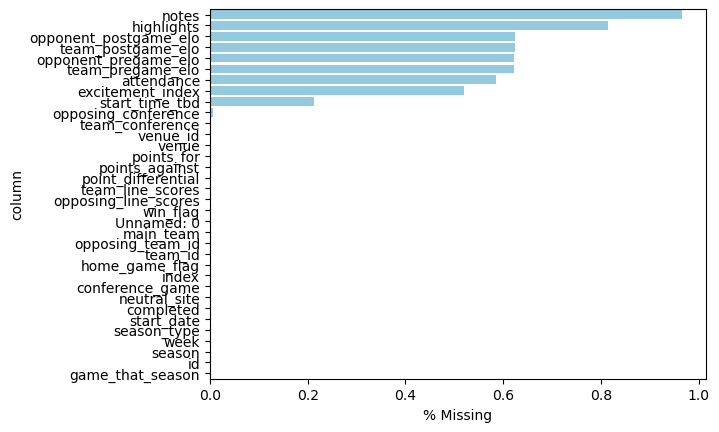

In [29]:
chart = plot_missingness(data)
chart

## Individual Recruiting Dataset

Created a no commitment flag to understand how many of the high school recruits coommitted. 

In [31]:
data = pd.read_csv('../data/recruits.csv')
data.head() 

,Unnamed: 0,index,id,athlete_id,recruit_type,year,ranking,name,school,committed_to,position,height,weight,stars,rating,city,state_province,country,latitude,longitude
0,0,0,66928,3915192.00,HighSchool,2015,1.00,Trenton Thompson,Westover,Georgia,DT,74.00,313.00,5,1.00,Albany,GA,USA,31.58,-84.16
1,1,1,31860,NaN,HighSchool,2015,1.00,Trent Thompson,Westover,Georgia,DT,74.50,313.00,5,1.00,Albany,GA,USA,31.58,-84.16
2,2,2,31861,-1009710.00,HighSchool,2015,2.00,Martez Ivey,Apopka,Florida,OT,77.50,275.00,5,1.00,Apopka,FL,USA,28.68,-81.51
3,3,3,31862,3916922.00,HighSchool,2015,3.00,Byron Cowart,Armwood,Auburn,SDE,76.00,250.00,5,1.00,Seffner,FL,USA,28.00,-82.27
4,4,4,31863,3912545.00,HighSchool,2015,4.00,Iman Marshall,Long Beach Poly,USC,CB,73.00,190.00,5,1.00,Long Beach,CA,USA,33.77,-118.19


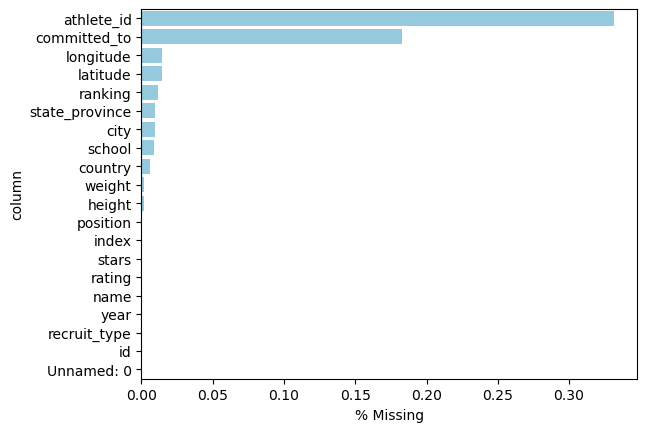

In [32]:
chart = plot_missingness(data)
chart

In [35]:
data['committed_hasdata_flag'] = np.where(data['committed_to'].isna(), 0, 1)

In [36]:
data.groupby(by = 'year').agg({'committed_hasdata_flag': 'mean'})

,committed_hasdata_flag
year,
2015,0.85
2016,0.81
2017,0.78
2018,0.79
2019,0.75
2020,0.75
2021,0.92
2022,0.93
2023,0.95


In [37]:
a = data.groupby(by = 'year').agg({'committed_hasdata_flag': 'mean'}).reset_index()

alt.Chart(a).mark_line().encode(
    x = 'year:O',
    y = alt.Y('committed_hasdata_flag', title = '% of Records with Committment Data'))\
.properties(height = 300, width = 400, title = '% of Recruits with Committment by Year')

alt.Chart(...)

In [38]:
data['rating_rounded'] = data['rating'].round(2)
scatter = data.groupby(by = ['year', 'rating_rounded']).agg({'committed_hasdata_flag': 'mean'}).reset_index()

alt.Chart(scatter).mark_circle().encode(
    x = alt.X('rating_rounded', scale=alt.Scale(domain=[.5, 1.0]), title = 'Recruiting Rating'), 
    y = alt.Y('committed_hasdata_flag', title = '% of Players With Committment Data')).facet(
    facet = 'year', columns = 4)

alt.FacetChart(...)

In [39]:
no_committed = data[data['committed_hasdata_flag'] == 0]

no_committed.sort_values(by = 'rating', ascending = False).head()

,Unnamed: 0,index,id,athlete_id,recruit_type,year,ranking,name,school,committed_to,position,height,weight,stars,rating,city,state_province,country,latitude,longitude,committed_hasdata_flag,rating_rounded
24444,24444,2,71460,NaN,HighSchool,2021,3.00,J.T. Tuimoloau,Eastside Catholic,NaN,SDE,76.00,277.00,5,1.00,Sammamish,WA,USA,47.61,-122.04,0,1.00
20150,20150,15,61584,NaN,HighSchool,2020,16.00,Zachary Evans,North Shore,NaN,RB,71.00,200.00,5,0.99,Houston,TX,USA,29.76,-95.37,0,0.99
29472,29472,28,92330,NaN,HighSchool,2023,26.00,Samuel M'Pemba,IMG Academy,NaN,ATH,76.00,230.00,5,0.99,Saint Louis,MO,USA,38.63,-90.20,0,0.99
29473,29473,29,92356,NaN,HighSchool,2023,26.00,Jaquavious Russaw,Carver,NaN,EDGE,74.00,230.00,5,0.99,Troy,AL,USA,31.81,-85.97,0,0.99
29506,29506,62,93081,NaN,HighSchool,2023,55.00,DeAndre Moore Jr.,Los Alamitos,NaN,ATH,72.00,185.00,4,0.98,Los Alamitos,CA,USA,33.80,-118.08,0,0.98


## Team Talent Composite Ratings 

Every school in this dataset has an overall talent score.

In [40]:
data = pd.read_csv('../data/team_talent.csv')

data.head()

,year,school,talent
0,2015,Alabama,981.90
1,2015,USC,926.71
2,2015,Ohio State,907.32
3,2015,Florida State,889.92
4,2015,LSU,889.37


In [41]:
# No Missing values
data.isna().sum()

year      0
school    0
talent    0
dtype: int64

In [42]:
data['talent'].describe()

count   2010.00
mean     348.40
std      285.56
min        0.00
25%       58.88
50%      351.21
75%      593.04
max     1016.79
Name: talent, dtype: float64

## Draft datasets

In [43]:
data = pd.read_csv('../data/draft.csv')

data.head()

,Unnamed: 0,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,wAV,DrAV,G,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,TD.1,Rec,Yds.2,TD.2,Solo,Int.1,Sk,College/Univ,Unnamed: 28_level_1,draft_year
0,0,1,1,KAN,Eric Fisher,T,22,2021,0,2,8,62,56,132,0,0,0,0,0,0,0,0,1,-3,1,NaN,NaN,NaN,Central Michigan,NaN,2013
1,1,1,2,JAX,Luke Joeckel,T,21,2017,0,0,3,21,16,50,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,Texas A&M,College Stats,2013
2,2,1,3,MIA,Dion Jordan,DE,23,2020,0,0,0,9,3,63,0,0,0,0,0,0,0,0,0,0,0,82,NaN,13.5,Oregon,College Stats,2013
3,3,1,4,PHI,Lane Johnson,T,23,2023,2,5,9,79,79,143,0,0,0,0,0,0,0,0,1,5,1,NaN,NaN,NaN,Oklahoma,College Stats,2013
4,4,1,5,DET,Ezekiel Ansah,DE,24,2020,0,1,5,39,37,93,0,0,0,0,0,0,0,0,0,0,0,174,NaN,50.5,BYU,College Stats,2013


In [47]:
# Important fields (Name, draft_year, and Pick) are populated
data.isna().sum()

Unnamed: 0                0
Rnd                       0
Pick                      0
Tm                        0
Player                    0
Pos                       0
Age                       4
To                      214
AP1                       0
PB                        0
St                        0
wAV                     214
DrAV                    361
G                       214
Cmp                     214
Att                     214
Yds                     214
TD                      214
Int                     214
Att.1                   214
Yds.1                   214
TD.1                    214
Rec                     214
Yds.2                   214
TD.2                    214
Solo                    953
Int.1                  2269
Sk                     2018
College/Univ              2
Unnamed: 28_level_1     309
draft_year                0
dtype: int64

## Team Attribute dataset 

In [48]:
data = pd.read_csv('../data/teams.csv')

data.head()

,Unnamed: 0,id,school,conference,division,color,logos
0,0,2005,Air Force,Mountain West,Mountain,#004a7b,http://a.espncdn.com/i/teamlogos/ncaa/500/2005...
1,1,2006,Akron,Mid-American,East,#00285e,http://a.espncdn.com/i/teamlogos/ncaa/500/2006...
2,2,333,Alabama,SEC,West,#690014,http://a.espncdn.com/i/teamlogos/ncaa/500/333.png
3,3,2026,Appalachian State,Sun Belt,East,#000000,http://a.espncdn.com/i/teamlogos/ncaa/500/2026...
4,4,12,Arizona,Pac-12,NaN,#002449,http://a.espncdn.com/i/teamlogos/ncaa/500/12.png


In [49]:
data.isna().sum()

Unnamed: 0     0
id             0
school         0
conference     0
division      53
color          0
logos          0
dtype: int64

In [50]:
data = pd.read_csv('../data/roster.csv')

data.head()

,Unnamed: 0,id,first_name,last_name,team,height,weight,jersey,year,position,home_city,home_state,home_country,home_latitude,home_longitude,home_county_fips,recruit_ids
0,0,13223,Justin,Johnson,Fresno State,73.00,201.00,25.00,2015,DB,Gardena,CA,USA,33.90,-118.31,6037.00,[23334]
1,1,29649,Jamaal,Jackson,Delaware State,NaN,NaN,NaN,2015,RB,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,100009,Johnny,Jackson,Arizona,NaN,NaN,NaN,2015,WR,San Diego,CA,USA,32.72,-117.16,6073.00,[]
3,3,106327,Jason,Johnson,Western Kentucky,72.00,NaN,5.00,2015,DB,Pahokee,FL,USA,26.82,-80.67,12099.00,[34236]
4,4,108118,Nicholas,Peoples,Grambling,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [53]:
# % missing values
data.isna().sum() / len(data)

Unnamed: 0         0.00
id                 0.00
first_name         0.00
last_name          0.00
team               0.00
height             0.05
weight             0.09
jersey             0.06
year               0.00
position           0.03
home_city          0.05
home_state         0.06
home_country       0.05
home_latitude      0.07
home_longitude     0.07
home_county_fips   0.07
recruit_ids        0.00
dtype: float64

# Game data

Based on this, grab the game that has the lowest elo_missing_percentage and higher amount of games = the week before thee last game in the regular season 

- make sure elo rating is as complete as possible 
    - get only power conference 
    - get the week before the last regular season game 
    

### Combine with team talent

In [283]:
teams = filtered_df['school'].unique() 
filtered_team_talend_df = df_team_talent[df_team_talent['school'].isin(teams)]
filtered_team_talend_df

,year,school,talent
0,2015,Alabama,981.90
1,2015,USC,926.71
2,2015,Ohio State,907.32
3,2015,Florida State,889.92
4,2015,LSU,889.37
...,...,...,...
1837,2023,Kansas State,616.00
1838,2023,Syracuse,610.75
1839,2023,Wake Forest,603.68
1842,2023,BYU,576.25


In [294]:
total_elo_talent = pd.merge(filtered_team_talend_df, filtered_df, on=['year', 'school']) 
total_elo_talent.head() 

,year,school,talent,game_that_season,season_type,team_conference,opposing_team_id,conference_game,team_postgame_elo,team_pregame_elo,win_flag
0,2015,Alabama,981.90,12,regular,SEC,2,True,2097.0,2098.0,1
1,2015,USC,926.71,12,regular,Pac-12,26,True,1840.0,1798.0,1
2,2015,Ohio State,907.32,12,regular,Big Ten,130,True,2107.0,2052.0,1
3,2015,Florida State,889.92,12,regular,ACC,57,False,1938.0,1872.0,1
4,2015,LSU,889.37,12,postseason,SEC,2641,False,1817.0,1769.0,1


In [288]:
import numpy as np 

/Users/andreeaserban/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


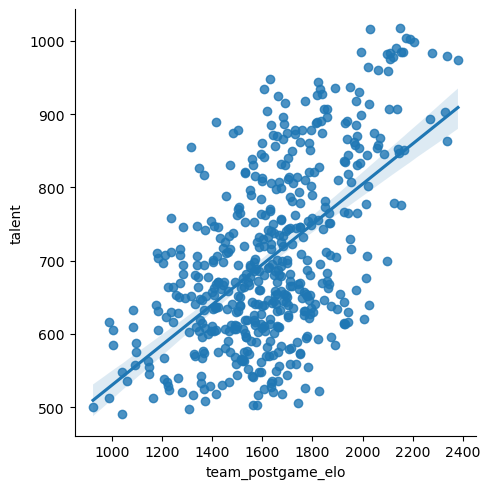

In [293]:
# sns.scatterplot(data=total_elo_talent, x='team_postgame_elo', y='talent')
# x = total_elo_talent['team_postgame_elo']
# y = total_elo_talent['talent']
sns.lmplot(data=total_elo_talent, x='team_postgame_elo', y='talent')

# plt.scatter(x, y, label='Data Points')
# slope, intercept = np.polyfit(x, y, 1)

# plt.plot(x, slope * x + intercept, color='red', label='Linear Regression')

# slope, intercept = np.polyfit(x, y, 1)


In [192]:
filtered_df.head() 

,season,game_that_season,Unnamed: 0,index,id,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,venue_id,venue,excitement_index,highlights,notes,main_team,home_game_flag,team_id,opposing_team_id,team_conference,opposing_conference,points_for,points_against,point_differential,team_line_scores,opposing_line_scores,team_pregame_elo,team_postgame_elo,opponent_pregame_elo,opponent_postgame_elo,win_flag
0,2013,12,6,1469,333342579,14,regular,2013-12-01T00:00:00.000Z,NaN,True,False,False,84174.0,3994.0,Williams-Brice Stadium,NaN,NaN,NaN,South Carolina,1,2579,228,SEC,ACC,31.0,17.0,14.0,"[7, 10, 0, 14]","[7, 3, 7, 0]",2001.0,2024.0,1942.0,1919.0,1
1,2013,12,214,1440,333340238,14,regular,2013-11-30T17:21:00.000Z,NaN,True,False,False,33019.0,3973.0,Vanderbilt Stadium,NaN,NaN,NaN,Wake Forest,0,154,238,ACC,SEC,21.0,23.0,-2.0,"[7, 7, 7, 0]","[7, 10, 0, 6]",1313.0,1316.0,1606.0,1603.0,0
2,2013,12,356,1437,333340127,14,regular,2013-11-30T17:00:00.000Z,NaN,True,False,True,71418.0,3936.0,Spartan Stadium,NaN,NaN,NaN,Minnesota,0,135,127,Big Ten,Big Ten,3.0,14.0,-11.0,"[0, 3, 0, 0]","[7, 0, 7, 0]",1569.0,1572.0,1893.0,1890.0,0
6,2013,12,913,1456,333340084,14,regular,2013-11-30T20:30:00.000Z,NaN,True,False,True,44882.0,3830.0,Memorial Stadium,NaN,NaN,NaN,Indiana,1,84,2509,Big Ten,Big Ten,56.0,36.0,20.0,"[14, 21, 14, 7]","[0, 9, 7, 20]",1432.0,1450.0,1141.0,1123.0,1
17,2013,12,2279,1447,333340254,14,regular,2013-11-30T19:00:00.000Z,NaN,True,False,True,45023.0,587.0,Rice-Eccles Stadium,NaN,NaN,NaN,Utah,1,254,38,Pac-12,Pac-12,24.0,17.0,7.0,"[14, 7, 0, 3]","[0, 0, 7, 10]",1514.0,1502.0,1097.0,1109.0,1


In [191]:
# total_elo_talent = pd.merge(filtered_team_talend_df, filtered_df, on=['year', 'school']) 

# filtered_df = pd.merge(last_regular_season, df, on=['season', 'game_that_season'], how='left')


In [180]:
# df_team_talent.head() 
# match on year and team too get full roster 

# df_roster.head() 

array(['South Carolina', 'Wake Forest', 'Minnesota', 'Indiana', 'Utah',
       'Vanderbilt', 'Miami', 'Michigan State', 'Kansas State', 'Arizona',
       'West Virginia', 'Ohio State', 'Wisconsin', 'Boston College',
       'Illinois', 'Georgia Tech', 'Florida', 'Maryland', 'NC State',
       'Texas A&M', 'Michigan', 'Oklahoma State', 'Virginia',
       'Penn State', 'Iowa', 'Arkansas', 'Oregon', 'Duke',
       'Virginia Tech', 'Tennessee', 'Oregon State', 'Missouri', 'Auburn',
       'Oklahoma', 'Baylor', 'Nebraska', 'Iowa State', 'Texas', 'Clemson',
       'TCU', 'UCLA', 'Washington', 'California', 'Pittsburgh',
       'Arizona State', 'Kentucky', 'Purdue', 'North Carolina',
       'Mississippi State', 'Georgia', 'Northwestern', 'Ole Miss',
       'Texas Tech', 'Kansas', 'LSU', 'Colorado', 'USC', 'Stanford',
       'Florida State', 'Syracuse', 'Washington State', 'Alabama',
       'Louisville', 'Rutgers', 'UCF'], dtype=object)

### Draft Data

In [301]:
roster_df = df_roster.rename(columns={'team': 'school'})
# roster_df.head() 

In [348]:
roster_df[(roster_df['year'] == 2021) & (roster_df['school'] == 'Michigan')].count()

Unnamed: 0          120
id                  120
first_name          120
last_name           120
school              120
height              120
weight              120
jersey              119
year                120
position            120
home_city           120
home_state          118
home_country        120
home_latitude       118
home_longitude      118
home_county_fips    118
recruit_ids         120
dtype: int64

In [339]:
roster_df[(roster_df['school'] == 'Michigan') & (roster_df['first_name'] == 'Aidan')]

,Unnamed: 0,id,first_name,last_name,school,height,weight,jersey,year,position,home_city,home_state,home_country,home_latitude,home_longitude,home_county_fips,recruit_ids
71229,14050,4372099,Aidan,Hutchinson,Michigan,78.0,269.0,97.0,2018,DL,Plymouth,MI,USA,45.006515,-93.46651,27053.0,[43019]
84525,11606,4372099,Aidan,Hutchinson,Michigan,78.0,269.0,97.0,2019,DL,Plymouth,MI,USA,45.006515,-93.46651,27053.0,[43019]
97663,6515,4372099,Aidan,Hutchinson,Michigan,78.0,269.0,97.0,2020,DL,Plymouth,MI,USA,45.006515,-93.46651,27053.0,[43019]
113295,5679,4372099,Aidan,Hutchinson,Michigan,78.0,269.0,97.0,2021,DL,Plymouth,MI,USA,45.006515,-93.46651,27053.0,[43019]


In [340]:
# filtered_df.head() 
players_team = pd.merge(filtered_df, roster_df, on=['year', 'school'], how='left')
players_team[['first_name', 'last_name']].head(20)

players_team[players_team['first_name'] == 'Aidan'][ 'last_name'].unique() 

array(['Gousby', 'Rafferty', 'Fedigan', 'Vaughan', 'Hegarty',
       'Livingston', 'Hall', 'Laughery', 'Birr', 'Semo', 'Mizell',
       'Herrera', 'Hutchinson', 'Saunders', 'Ryan', 'McDermott',
       'McCowan', 'Schneider', 'Willard', 'Chiles', 'Harrison',
       'Marshall', 'Bouman', 'Bitter', 'Ralph', 'Gilmore', 'Swanson',
       'Anderson', 'Lee', 'Robbins', "O'Connell", 'Martin', 'Smith',
       'Hubbard', 'Gray', 'Madden', 'Corbello', 'Flintoft', 'Shahriari'],
      dtype=object)

In [326]:
players_team.head() 

,year,game_that_season,season_type,team_conference,school,opposing_team_id,conference_game,team_postgame_elo,team_pregame_elo,win_flag,Unnamed: 0,id,first_name,last_name,height,weight,jersey,position,home_city,home_state,home_country,home_latitude,home_longitude,home_county_fips,recruit_ids
0,2013,12,regular,SEC,South Carolina,228,False,2024.0,2001.0,1,483,483192,Jimmy,Legree,72.0,NaN,15.0,CB,Beaufort,SC,USA,32.431581,-80.669829,45013.0,[15787]
1,2013,12,regular,SEC,South Carolina,228,False,2024.0,2001.0,1,484,483209,Chaz,Sutton,77.0,NaN,90.0,DE,Savannah,GA,USA,32.080926,-81.091177,13051.0,[57181]
2,2013,12,regular,SEC,South Carolina,228,False,2024.0,2001.0,1,1389,502011,Sidney,Rhodes,70.0,NaN,30.0,CB,Easley,SC,USA,34.826928,-82.581705,45077.0,[]
3,2013,12,regular,SEC,South Carolina,228,False,2024.0,2001.0,1,1829,504278,Patrick,Fish,72.0,NaN,18.0,P,Shelby,NC,USA,35.291949,-81.540211,37045.0,[19317]
4,2013,12,regular,SEC,South Carolina,228,False,2024.0,2001.0,1,1830,504279,Cody,Gibson,79.0,NaN,90.0,TE,Tallahassee,FL,USA,30.438083,-84.280933,12073.0,[17885]


In [325]:
df_draft['draft_year'].min() 

2013

In [343]:
# cols = ['season', 'game_that_season', 'season_type', 'main_team','opposing_team_id','conference_game','team_postgame_elo', 'team_pregame_elo', 'win_flag']

df_draft[(df_draft['College/Univ'] == 'Michigan') & (df_draft['Player'] == 'Aidan Hutchinson') ][['Player', 'College/Univ', 'draft_year']]
# filtered_df[cols].head()

# draft_cols = ['draft_year', 'College/Univ', 'Player','Pick']
# df_draft.head()

,Player,College/Univ,draft_year
2351,Aidan Hutchinson,Michigan,2022
